# Data viz with plotly

## Step1. Import dependencies

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [4]:
! pip install chart_studio

## Step2. Read data

In [6]:
university_input_file = '../data/university.csv'

In [7]:
university=pd.read_csv(university_input_file)

In [8]:
university.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [9]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

## Step3. Basic data viz

In below line chart, we compare the citation with teaching for the top 100 universities in the world rank

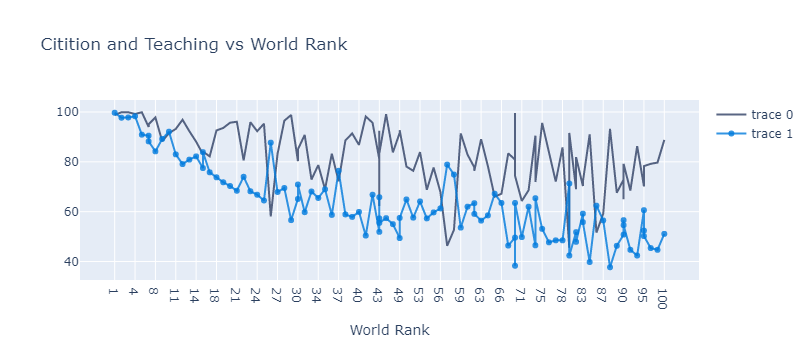

In [10]:
top_100 = university.iloc[:100,:]

# first line plot for citation
citation = go.Scatter(
x=top_100.world_rank,
y=top_100.citations,
mode = "lines",
marker={"color":"rgba(48, 64, 101, 0.8)"},
text= top_100.university_name)

# second line plot for teaching
teaching = go.Scatter(
x=top_100.world_rank,
y=top_100.teaching,
mode = "lines+markers",
marker=dict(color="rgba(0,123,221,.8)"),
text=top_100.university_name)
data1 = [citation,teaching]
layout = dict(title = "Citition and Teaching vs World Rank", xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))
fig = dict(data = data1, layout = layout)
iplot(fig)


This time, we want to see the citation number of 2014, 2015 and 2016 of the top 100 universities (world rank)

In [11]:
rank_2014 = university[university.year == 2014].iloc[:100,:]
rank_2015 = university[university.year == 2015].iloc[:100,:]
rank_2016 = university[university.year == 2016].iloc[:100,:]

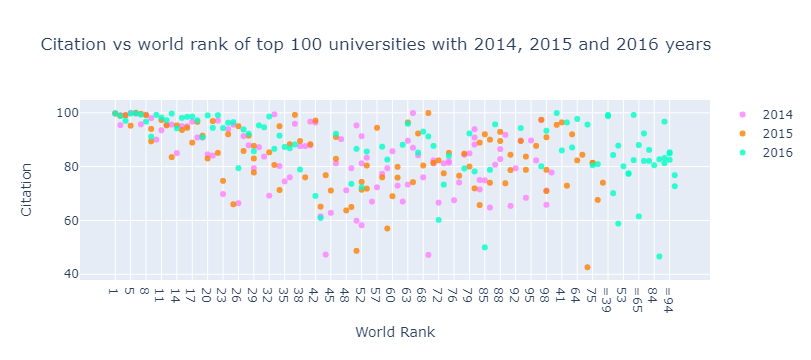

In [12]:
trace1 =go.Scatter(
                    x = rank_2014.world_rank,
                    y = rank_2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= rank_2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = rank_2015.world_rank,
                    y = rank_2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= rank_2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = rank_2016.world_rank,
                    y = rank_2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= rank_2016.university_name)
data1 = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data1, layout = layout)
iplot(fig)

## Step 4. Advance data viz (3D Scatter plot)

In below plot, x axis express university world rank, y axis express teaching score,z axis express citiation number, color is research, size is total score in 2016

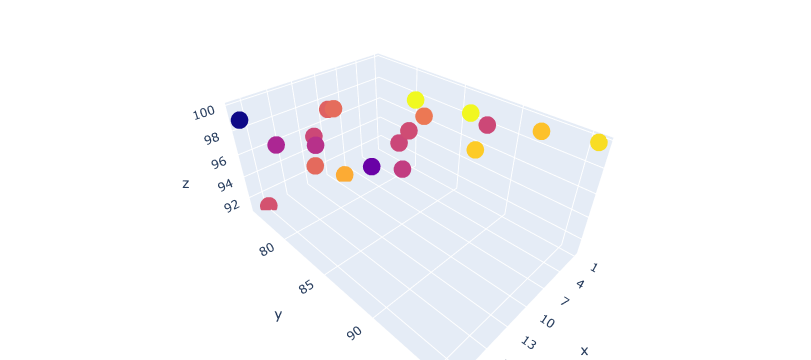

In [14]:
rank_2016_20 = university[university.year == 2016].iloc[:20,:]
color_3d = rank_2016_20.research
rank_2016_20.total_score = rank_2016_20.total_score.astype(float)
# the size here is the diameter of the circle, it must be numeric
size_3d = rank_2016_20.total_score
trace = go.Scatter3d(
x = rank_2016_20.world_rank,
y = rank_2016_20.teaching,
z = rank_2016_20.citations,
mode = "markers",
# you can replace the size value by size_3d, and check the result
marker = dict ( color = color_3d,size = 10),
text = rank_2016_20.university_name
)
data6 = [trace]
layout = go.Layout(margin = dict(l=0,r=0,b=0,t=0))
fig = go.Figure(data = data6,layout = layout)
iplot(fig)